In [1]:
import pandas as pd
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States'

In [3]:
# view data from url

tables = pd.read_html(url)
tables

[                             City                                Building  \
       Second Continental Congress             Second Continental Congress   
 0      Philadelphia, Pennsylvania                       Independence Hall   
 1             Baltimore, Maryland                        Henry Fite House   
 2      Philadelphia, Pennsylvania                       Independence Hall   
 3         Lancaster, Pennsylvania                             Court House   
 4              York, Pennsylvania  Court House (now Colonial Court House)   
 5      Philadelphia, Pennsylvania           College Hall[citation needed]   
 6   Congress of the Confederation           Congress of the Confederation   
 7      Philadelphia, Pennsylvania                       Independence Hall   
 8        Princeton, New Jersey[a]                             Nassau Hall   
 9             Annapolis, Maryland                    Maryland State House   
 10            Trenton, New Jersey                      French A

In [4]:
# scrape data from website table

df = tables[1]
df.columns = [
              'State', 'Capital',  'Year', 'Area', 'Municipal Population', 
              'Metropolitan Population', 'Population Rank', 'Notes']
df.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population,Population Rank,Notes
0,Alabama,Montgomery,1846,159.8,198525,373290,461516,3
1,Alaska,Juneau,1906,2716.7,32113,32113,NaN,3
2,Arizona,Phoenix,1912,517.6,1680992,4948203,5002221,1
3,Arkansas,Little Rock,1821,116.2,197312,742384,908941,1
4,California,Sacramento,1854,97.9,513624,2363730,2639124,6


In [5]:
# clean up data

del df['Population Rank']
del df['Notes']
df = df.iloc[:-1 , :]

In [6]:
df.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population
0,Alabama,Montgomery,1846,159.8,198525,373290
1,Alaska,Juneau,1906,2716.7,32113,32113
2,Arizona,Phoenix,1912,517.6,1680992,4948203
3,Arkansas,Little Rock,1821,116.2,197312,742384
4,California,Sacramento,1854,97.9,513624,2363730


In [7]:
# turn into numeric values

df['Area'] = pd.to_numeric(df['Area'])
df['Municipal Population'] = pd.to_numeric(df['Municipal Population'])
df['Metropolitan Population'] = pd.to_numeric(df['Metropolitan Population'])
df['Year'] = pd.to_numeric(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    50 non-null     object 
 1   Capital                  50 non-null     object 
 2   Year                     50 non-null     int64  
 3   Area                     50 non-null     float64
 4   Municipal Population     50 non-null     int64  
 5   Metropolitan Population  50 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB


C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [8]:
df.describe()

,Year,Area,Municipal Population,Metropolitan Population
count,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,1832.080000,157.338000,2.716945e+05,1.129081e+06
std,59.710813,393.312478,3.269978e+05,1.372922e+06
min,1610.000000,6.730000,7.855000e+03,2.067200e+04
25%,1813.000000,23.525000,5.112500e+04,1.873065e+05
50%,1845.500000,64.050000,1.674965e+05,6.298355e+05
75%,1867.000000,115.800000,3.033475e+05,1.404409e+06
max,1912.000000,2716.700000,1.680992e+06,6.020364e+06


In [9]:
# read in second dataset

states = pd.read_csv('states.csv')
states.dropna(inplace = True) 
states.head()

,Initial,Lat,Lng,State
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [10]:
# join the csv with the scraped dataset

states = states.join(df.set_index('State'), on='State')

In [11]:
states.head()

,Initial,Lat,Lng,State,Capital,Year,Area,Municipal Population,Metropolitan Population
0,AK,63.588753,-154.493062,Alaska,Juneau,1906.0,2716.7,32113.0,32113.0
1,AL,32.318231,-86.902298,Alabama,Montgomery,1846.0,159.8,198525.0,373290.0
2,AR,35.201050,-91.831833,Arkansas,Little Rock,1821.0,116.2,197312.0,742384.0
3,AZ,34.048928,-111.093731,Arizona,Phoenix,1912.0,517.6,1680992.0,4948203.0
4,CA,36.778261,-119.417932,California,Sacramento,1854.0,97.9,513624.0,2363730.0


In [12]:
# heatmap of capitals with largest area

# store lat and lng values
locations = states[["Lat", "Lng"]]

# store area values
rating = states["Area"]

In [13]:
# plot heatmap
fig = gmaps.figure()

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(height='420px'))

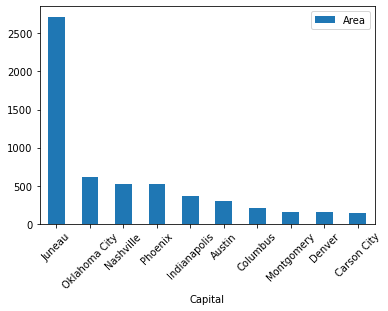

In [14]:
# bar chart for capitals with the largest area

largest_area = df.sort_values(by='Area', ascending=False).head(10)
largest_area_chart = largest_area.plot.bar(x='Capital', y='Area', rot=45)

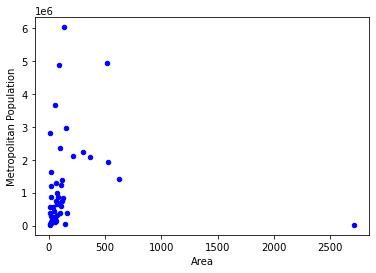

In [15]:
# scatter plot for municipal population vs area

ax1 = states.plot.scatter(x='Area',
                      y='Metropolitan Population',
                      c='blue')

In [16]:
# create new dataframe to create a table to filter through
states.set_index('Capital', inplace=True)
states.dropna(inplace = True) 
states.head()

,Initial,Lat,Lng,State,Year,Area,Municipal Population,Metropolitan Population
Capital,,,,,,,,
Juneau,AK,63.588753,-154.493062,Alaska,1906.0,2716.7,32113.0,32113.0
Montgomery,AL,32.318231,-86.902298,Alabama,1846.0,159.8,198525.0,373290.0
Little Rock,AR,35.201050,-91.831833,Arkansas,1821.0,116.2,197312.0,742384.0
Phoenix,AZ,34.048928,-111.093731,Arizona,1912.0,517.6,1680992.0,4948203.0
Sacramento,CA,36.778261,-119.417932,California,1854.0,97.9,513624.0,2363730.0


In [17]:
# locate an individual state
states.loc['Sacramento']

Initial                             CA
Lat                            36.7783
Lng                           -119.418
State                       California
Year                              1854
Area                              97.9
Municipal Population            513624
Metropolitan Population    2.36373e+06
Name: Sacramento, dtype: object

In [18]:
html_table = states.to_html()
html_table
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Initial</th>      <th>Lat</th>      <th>Lng</th>      <th>State</th>      <th>Year</th>      <th>Area</th>      <th>Municipal Population</th>      <th>Metropolitan Population</th>    </tr>    <tr>      <th>Capital</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Juneau</th>      <td>AK</td>      <td>63.588753</td>      <td>-154.493062</td>      <td>Alaska</td>      <td>1906.0</td>      <td>2716.70</td>      <td>32113.0</td>      <td>32113.0</td>    </tr>    <tr>      <th>Montgomery</th>      <td>AL</td>      <td>32.318231</td>      <td>-86.902298</td>      <td>Alabama</td>      <td>1846.0</td>      <td>159.80</td>      <td>198525.0</td>      <td>373290.0</td>    </tr>    <tr>      <th>Little Rock</th>      <td>AR</td>      <td>35.201050</td>      <td>-91.831833</